## Imports


In [1]:
# Adding needed libraries and reading data
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import ensemble
# from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

train = pd.read_csv('../artifact/train.csv')
# test = pd.read_csv('../artifact/test.csv')

In [2]:
selected = ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd','SalePrice']
train = train[selected]

In [3]:
train.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,1,65.0,8450,7,2003,2003,1710,2,1,3,8,208500
1,2,80.0,9600,6,1976,1976,1262,2,0,3,6,181500
2,3,68.0,11250,7,2001,2002,1786,2,1,3,6,223500
3,4,60.0,9550,7,1915,1970,1717,1,0,3,7,140000
4,5,84.0,14260,8,2000,2000,2198,2,1,4,9,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   OverallQual   1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   YearRemodAdd  1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   HalfBath      1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  TotRmsAbvGrd  1460 non-null   int64  
 11  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 137.0 KB


In [5]:
train.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,1971.267808,1984.865753,1515.463699,1.565068,0.382877,2.866438,6.517808,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,30.202904,20.645407,525.480383,0.550916,0.502885,0.815778,1.625393,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,2.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,1954.000000,1967.000000,1129.500000,1.000000,0.000000,2.000000,5.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,1973.000000,1994.000000,1464.000000,2.000000,0.000000,3.000000,6.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,2000.000000,2004.000000,1776.750000,2.000000,1.000000,3.000000,7.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,5642.000000,3.000000,2.000000,8.000000,14.000000,755000.000000


In [6]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [7]:
# Spliting to features and lables and deleting variable I don't need
train_labels = train.pop('SalePrice')

features = train

## Fill NAN and Converting features

In [8]:
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

In [9]:
features.shape

(1460, 11)

In [10]:
features.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd'],
      dtype='object')

In [11]:
features.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd
0,1,65.0,8450,7,2003,2003,1710,2,1,3,8
1,2,80.0,9600,6,1976,1976,1262,2,0,3,6
2,3,68.0,11250,7,2001,2002,1786,2,1,3,6
3,4,60.0,9550,7,1915,1970,1717,1,0,3,7
4,5,84.0,14260,8,2000,2000,2198,2,1,4,9


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   OverallQual   1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   YearRemodAdd  1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   HalfBath      1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  TotRmsAbvGrd  1460 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 125.6 KB


In [13]:
features.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,1971.267808,1984.865753,1515.463699,1.565068,0.382877,2.866438,6.517808
std,421.610009,22.024023,9981.264932,1.382997,30.202904,20.645407,525.480383,0.550916,0.502885,0.815778,1.625393
min,1.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,365.750000,60.000000,7553.500000,5.000000,1954.000000,1967.000000,1129.500000,1.000000,0.000000,2.000000,5.000000
50%,730.500000,70.049958,9478.500000,6.000000,1973.000000,1994.000000,1464.000000,2.000000,0.000000,3.000000,6.000000
75%,1095.250000,79.000000,11601.500000,7.000000,2000.000000,2004.000000,1776.750000,2.000000,1.000000,3.000000,7.000000
max,1460.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,5642.000000,3.000000,2.000000,8.000000,14.000000


## Log transforming

C:\Users\m477a\AppData\Local\Temp\ipykernel_17444\3445750104.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train_labels)


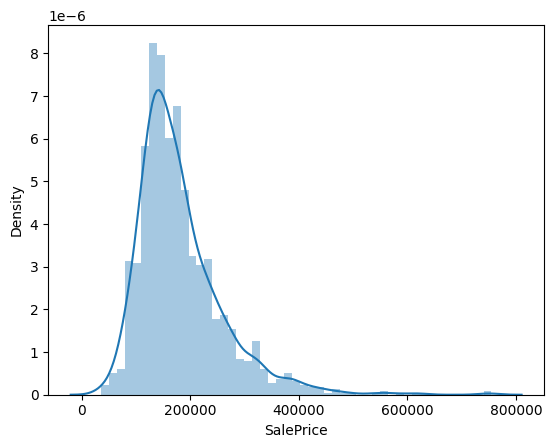

In [14]:
# Our SalesPrice is skewed right (check plot below). I'm logtransforming it. 
ax = sns.distplot(train_labels)

In [15]:
## Log transformation of labels
train_labels = np.log(train_labels)

C:\Users\m477a\AppData\Local\Temp\ipykernel_17444\2645756389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train_labels)


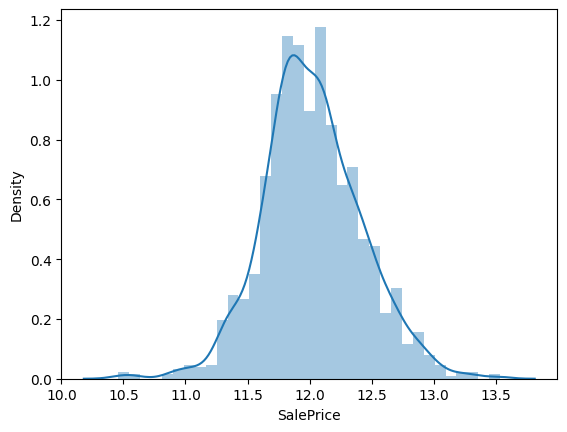

In [16]:
## Now it looks much better
ax = sns.distplot(train_labels)

### Test

### Splitting train and test 

In [17]:
### Splitting features
train_features = features.drop('Id', axis=1).select_dtypes(include=[np.number]).values

In [18]:
features.head(1)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd
0,1,65.0,8450,7,2003,2003,1710,2,1,3,8


In [19]:
features.values[0]

array([1.000e+00, 6.500e+01, 8.450e+03, 7.000e+00, 2.003e+03, 2.003e+03,
       1.710e+03, 2.000e+00, 1.000e+00, 3.000e+00, 8.000e+00])

In [20]:
train_features[0]

array([6.500e+01, 8.450e+03, 7.000e+00, 2.003e+03, 2.003e+03, 1.710e+03,
       2.000e+00, 1.000e+00, 3.000e+00, 8.000e+00])

In [21]:
type(train_features)

numpy.ndarray

In [22]:
print(train_features.shape)

(1460, 10)


### Splitting train and validation 

In [35]:
# train_labels.values

In [23]:
### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=0)

In [33]:
type(y_test)

pandas.core.series.Series

In [24]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (1314, 10)
y_train:  (1314,)
x_test:  (146, 10)
y_test:  (146,)


### Gradient Boosting

In [25]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)

In [26]:
train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=10,
                          n_estimators=3000)
R2: 0.9357586313764864
RMSE: 0.09575659508672953
Test
R2: 0.8486330929997101
RMSE: 0.13316408229821838


In [27]:
pred = GBest.predict(x_test)

In [ ]:
r2 = r2_score(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
    
print("R-Square: ",r2)
print("RMSE: ",rmse)  
print("MSE: ",mse) 
print("MAE: ",mae)

R-Square:  0.8705004218758442
RMSE:  0.13316408229821838
MSE:  0.017732672814326677
MAE:  0.09182392011067872


In [29]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42).fit(x_train, y_train)

predictions3 = xgboost.predict(x_test)

r2 = r2_score(y_test, predictions3)
rmse = np.sqrt(mean_squared_error(y_test, predictions3))
mse = mean_squared_error(y_test, predictions3)
mae = mean_absolute_error(y_test, predictions3)
    
print("R-Square: ",r2)
print("RMSE: ",rmse)  
print("MSE: ",mse) 
print("MAE: ",mae)

c:\Users\m477a\Anaconda3\envs\mlops2\lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R-Square:  0.8386474952329718
RMSE:  0.1486417396413068
MSE:  0.022094366763594043
MAE:  0.10081443143384484


In [30]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.03)


In [31]:
gbpred = GBest.predict(x_test)

In [32]:
x_train[0]

array([7.300e+01, 8.925e+03, 8.000e+00, 2.007e+03, 2.007e+03, 1.466e+03,
       2.000e+00, 0.000e+00, 3.000e+00, 7.000e+00])

In [33]:
x_test[0]

array([7.00499584e+01, 3.26680000e+04, 6.00000000e+00, 1.95700000e+03,
       1.97500000e+03, 2.51500000e+03, 3.00000000e+00, 0.00000000e+00,
       4.00000000e+00, 9.00000000e+00])

In [34]:
gbpred = np.expm1(gbpred)
gbpred

array([238522.84999119, 138332.7580344 , 123278.16002071, 196027.3440021 ,
        96473.29649318, 101871.06099299, 217796.18387758, 123592.87627484,
       358906.82423661, 168644.85638947, 199950.93601544, 154426.68412878,
       233865.39192997, 114880.20860861, 115628.65378339, 136579.79038704,
       210218.62998688, 131303.25145209, 151004.4720529 , 150341.34556718,
       118947.60703945, 142822.31554742, 112158.19509543, 170322.84802495,
       169731.87826857, 180507.46129241, 168510.57274782,  77327.55208991,
       328674.47387706, 118749.94756985, 126079.78673099, 202593.56924976,
       136957.64601625, 283361.03973077, 300523.84566004, 194690.00121988,
       288788.0710695 , 125031.53017291, 226299.6918437 , 360482.68770727,
       205221.72864293, 128064.03464615, 191408.90068479, 269767.57193937,
       305352.39279362, 135628.56589722, 115558.49969304, 127895.14864213,
       165890.83734061, 102832.15690713, 424856.44893819, 138133.76724655,
       168150.30088799,  

In [35]:
y_test = np.expm1(y_test)
y_test

529     200623.0
491     132999.0
459     109999.0
279     191999.0
655      87999.0
          ...   
1452    144999.0
113     216999.0
1282    150499.0
1163    108958.0
310     165599.0
Name: SalePrice, Length: 146, dtype: float64

### Preprocessing

In [36]:
test_1 = features.select_dtypes(include=[np.number]).values[0]
test_1 = test_1[:10]
reshaped = test_1.reshape(1, 10)
pred = GBest.predict(reshaped)
pred = np.expm1(pred)

In [37]:
pred[0]

np.float64(182716.97274481025)

In [38]:
integer_value = int(pred[0])  # Access the first (and only) element and convert
print(integer_value) 

182716


## MLOPS

In [39]:
# import mlflow
# from mlflow.models import infer_signature

# mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# mlflow.set_experiment("house price prediction one")

In [40]:
# params = {'n_estimators':3000, 'learning_rate':0.05, 'max_depth':3, 'max_features':'sqrt','min_samples_leaf':15, 'min_samples_split':10, 'loss':'huber'}

# gbr = ensemble.GradientBoostingRegressor(**params).fit(x_train, y_train)

# # Predict on the test set
# y_pred = gbr.predict(x_test)

# # Calculate accuracy as a target loss metric
# r2 = r2_score(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae = mean_absolute_error(y_test, y_pred)

# # accuracy = accuracy_score(y_test, y_pred)

In [41]:
# # Start an MLflow run
# with mlflow.start_run():
#     # Log the hyperparameters
#     mlflow.log_params(params)

#     # Log the loss metric
#     mlflow.log_metric("R2", r2)
#     mlflow.log_metric("RMSE", rmse)
#     mlflow.log_metric("MAE", mae)

#     # Set a tag that we can use to remind ourselves what this run was for
#     mlflow.set_tag("Training Info", "Basic LR model for iris data")

#     # Infer the model signature
#     signature = infer_signature(x_train, gbr.predict(x_train))

#     # Log the model
#     model_info = mlflow.sklearn.log_model(
#         sk_model=gbr,
#         artifact_path="house_pred",
#         signature=signature,
#         input_example=x_train,
#         registered_model_name="tracking-quickstart-house-price-prediction",
#     )